In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, fbeta_score, make_scorer, roc_auc_score

In [2]:
df = pd.read_csv(r'C:\Users\bradl\OneDrive\Desktop\ML_Final Prep\diabetes (2).csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
missing_data = df.isnull().sum() / len(df) * 100
print(missing_data)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


In [5]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [43]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_params = {'max_depth': [2,3,4,5],
             'min_samples_leaf': [0.015, 0.02, 0.025, 0.03, 0.05],
             'n_estimators': [10, 60, 100]}

rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=10, n_jobs=-1)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))
print(rf.best_params_)
print(rf.best_score_)

0.8322475570032574
0.7142857142857143
{'max_depth': 5, 'min_samples_leaf': 0.015, 'n_estimators': 10}
0.7802221047065045


In [44]:
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7142857142857143


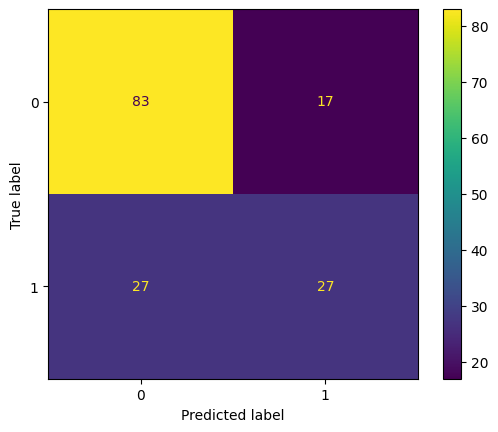

In [45]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()


#ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=rf.classes_)
#alternative way to plot confusion matrix in this way

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       100
           1       0.61      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



In [47]:
rfe = RFE(rf, n_features_to_select=10)
rfe.fit(X_train, y_train)


RFE(estimator=GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                           param_grid={'max_depth': [2, 3, 4, 5],
                                       'min_samples_leaf': [0.015, 0.02, 0.025,
                                                            0.03, 0.05],
                                       'n_estimators': [10, 60, 100]}),
    n_features_to_select=10)